**1. Loading the dataset**
 

 

In [44]:

%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [45]:


from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("labeled_data.csv")
data_unlabeled = pd.read_csv("unlabeled_data.csv")

# Load the dataset
data = pd.read_csv("labeled_data.csv")
data_unlabeled = pd.read_csv("unlabeled_data.csv")


# Load the dataset
data = pd.read_csv("labeled_data.csv")
data_unlabeled = pd.read_csv("unlabeled_data.csv")


**2. Explore the dataset (EDA)**

In [46]:
# Check the first few rows and the shape of the DataFrame
print(data.shape)
data.tail()

(32619, 14)


,ID,Date,Item Code,Quantity_Sold_(kilo),Unit Selling Price (RMB/kg),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%),entropy,Weekday,IsWeekend
32614,32584,2022-07-30,102900011023464,0.210,-11.000000,Xiaoqingcai (1),1011010101,Flower/Leaf Vegetables,6.06,Xiaoqingcai (1),10.33,0.196528,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend
32615,32583,2022-07-30,102900011022764,0.552,10.000000,Changxianqie,1010501,Solanum,6.26,Changxianqie,6.90,0.245184,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend
32616,32582,2022-07-30,102900011016701,28.886,-7.000000,Wuhu Green Pepper (1),1011010504,Capsicum,1.74,Wuhu Green Pepper (1),5.70,17.210785,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend
32617,32581,2022-07-30,102900011013274,13.000,-5.346154,The White Mushroom (Bag),1011010801,Edible Mushroom,4.08,The White Mushroom (Bag),6.57,7.910126,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend
32618,32585,2022-07-30,102900011030059,68.000,3.641176,Yunnan Lettuce (Bag),1011010101,Flower/Leaf Vegetables,2.00,Yunnan Lettuce (Bag),9.43,120.412683,It would be so helpful to know the weekday,It would be so helpful to know if IsWeekend


In [47]:
#check non-null valus and describe the data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32619 entries, 0 to 32618
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           32619 non-null  int64  
 1   Date                         32619 non-null  object 
 2   Item Code                    32619 non-null  int64  
 3   Quantity_Sold_(kilo)         32619 non-null  float64
 4   Unit Selling Price (RMB/kg)  32619 non-null  float64
 5   Item Name_x                  32619 non-null  object 
 6   Category Code                32619 non-null  int64  
 7   Category Name                32619 non-null  object 
 8   Wholesale Price (RMB/kg)     30941 non-null  float64
 9   Item Name_y                  32619 non-null  object 
 10  Loss Rate (%)                32619 non-null  float64
 11  entropy                      32619 non-null  float64
 12  Weekday                      32619 non-null  object 
 13  IsWeekend       

,ID,Item Code,Quantity_Sold_(kilo),Unit Selling Price (RMB/kg),Category Code,Wholesale Price (RMB/kg),Loss Rate (%),entropy
count,32619.000000,3.261900e+04,32619.000000,32619.000000,3.261900e+04,30941.000000,32619.000000,32619.000000
mean,16310.000000,1.030752e+14,8.939547,8.086556,9.106575e+08,6.098334,10.788401,8.950003
std,9416.438552,8.243665e+11,12.848502,9.612330,3.021399e+08,4.993883,5.455332,20.060485
min,1.000000,1.029000e+14,-1.000000,-116.000000,1.010101e+06,0.040000,0.000000,-210.857945
25%,8155.500000,1.029000e+14,1.976000,4.000000,1.011010e+09,3.120000,6.730000,0.610880
50%,16310.000000,1.029000e+14,4.814000,7.900000,1.011010e+09,4.800000,9.890000,3.321794
75%,24464.500000,1.029000e+14,10.826500,12.000000,1.011011e+09,7.510000,13.700000,10.594928
max,32619.000000,1.069740e+14,279.000000,116.000000,1.011011e+09,80.000000,29.250000,517.442142


In [48]:
data_unlabeled.info()
data_unlabeled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13980 entries, 0 to 13979
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           13980 non-null  int64  
 1   Date                         13980 non-null  object 
 2   Item Code                    13980 non-null  int64  
 3   Unit Selling Price (RMB/kg)  13980 non-null  float64
 4   Item Name_x                  13980 non-null  object 
 5   Category Code                13980 non-null  int64  
 6   Category Name                13980 non-null  object 
 7   Wholesale Price (RMB/kg)     13312 non-null  float64
 8   Item Name_y                  13980 non-null  object 
 9   Loss Rate (%)                13980 non-null  float64
 10  entropy                      13980 non-null  float64
 11  Weekday                      13980 non-null  object 
 12  IsWeekend                    13980 non-null  object 
dtypes: float64(4), i

,ID,Item Code,Unit Selling Price (RMB/kg),Category Code,Wholesale Price (RMB/kg),Loss Rate (%),entropy
count,13980.000000,1.398000e+04,13980.000000,1.398000e+04,13312.000000,13980.000000,13980.000000
mean,39609.500000,1.030581e+14,6.523989,9.109496e+08,5.034691,9.203146,13.047978
std,4035.822717,7.848610e+11,8.106051,3.017545e+08,4.968140,4.256103,26.335409
min,32620.000000,1.029000e+14,-59.600000,1.010101e+06,0.010000,0.000000,-383.657570
25%,36114.750000,1.029000e+14,3.500000,1.011010e+09,2.150000,8.710000,0.896010
50%,39609.500000,1.029000e+14,5.278636,1.011010e+09,3.460000,9.430000,4.957463
75%,43104.250000,1.029000e+14,9.400000,1.011011e+09,6.682500,9.430000,16.487810
max,46599.000000,1.069728e+14,111.916667,1.011011e+09,141.000000,29.250000,584.104369


In [49]:
data.isnull().sum()


ID                                0
Date                              0
Item Code                         0
Quantity_Sold_(kilo)              0
Unit Selling Price (RMB/kg)       0
Item Name_x                       0
Category Code                     0
Category Name                     0
Wholesale Price (RMB/kg)       1678
Item Name_y                       0
Loss Rate (%)                     0
entropy                           0
Weekday                           0
IsWeekend                         0
dtype: int64

In [50]:
data_unlabeled.isnull().sum()

ID                               0
Date                             0
Item Code                        0
Unit Selling Price (RMB/kg)      0
Item Name_x                      0
Category Code                    0
Category Name                    0
Wholesale Price (RMB/kg)       668
Item Name_y                      0
Loss Rate (%)                    0
entropy                          0
Weekday                          0
IsWeekend                        0
dtype: int64

**3. Data Cleaning and Engineering:**  <br>
* Change date column type to Date
* Turn Weekday and IsWeekend into numerical values
* Replace missing Wholesale Prices using the mean of each category

In [51]:
#Labeled Data
#change Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

#Recreate the 'IsWeekend' and Weekday column based on the 'Date' column
data['IsWeekend'] = 0
data['Weekday'] = ""
data['dayofweek'] = 0

data['dayofweek'] = data['Date'].dt.dayofweek
data['Weekday'] = data['Date'].dt.day_name()
for i in range(len(data)):
    if data.loc[i, 'dayofweek'] >= 5:
        data.loc[i, 'IsWeekend'] = 1

#Unlabeled Data
#change Date column to datetime format
data_unlabeled['Date'] = pd.to_datetime(data_unlabeled['Date'], format='%Y-%m-%d')
#Recreate the 'IsWeekend' and Weekday column based on the 'Date' column
data_unlabeled['IsWeekend'] = 0
data_unlabeled['Weekday'] = ""
data_unlabeled['dayofweek'] = 0
data_unlabeled['dayofweek'] = data_unlabeled['Date'].dt.dayofweek
data_unlabeled['Weekday'] = data_unlabeled['Date'].dt.day_name()
for i in range(len(data_unlabeled)):
    if data_unlabeled.loc[i, 'dayofweek'] >= 5:
        data_unlabeled.loc[i, 'IsWeekend'] = 1

In [52]:


#Labeled Data
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Weekday']])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Weekday']))
date_encoded_df = pd.concat([data, encoded_df], axis=1)
date_encoded_df



,ID,Date,Item Code,Quantity_Sold_(kilo),Unit Selling Price (RMB/kg),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,...,Weekday,IsWeekend,dayofweek,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,1,2020-07-01,102900005115762,6.841,6.000000,Amaranth,1011010101,Flower/Leaf Vegetables,3.88,Amaranth,...,Wednesday,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,21,2020-07-01,102900005117209,1.909,16.000000,7 Colour Pepper (1),1011010504,Capsicum,7.58,7 Colour Pepper (1),...,Wednesday,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,2020-07-01,102900005118817,5.472,14.000000,Spinach,1011010101,Flower/Leaf Vegetables,8.47,Spinach,...,Wednesday,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23,2020-07-01,102900005118824,4.119,10.000000,High Melon (1),1011010402,Aquatic Tuberous Vegetables,5.65,High Melon (1),...,Wednesday,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24,2020-07-01,102900005118831,10.000,6.850000,Wawacai,1011010101,Flower/Leaf Vegetables,4.13,Wawacai,...,Wednesday,0,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32614,32584,2022-07-30,102900011023464,0.210,-11.000000,Xiaoqingcai (1),1011010101,Flower/Leaf Vegetables,6.06,Xiaoqingcai (1),...,Saturday,1,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32615,32583,2022-07-30,102900011022764,0.552,10.000000,Changxianqie,1010501,Solanum,6.26,Changxianqie,...,Saturday,1,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32616,32582,2022-07-30,102900011016701,28.886,-7.000000,Wuhu Green Pepper (1),1011010504,Capsicum,1.74,Wuhu Green Pepper (1),...,Saturday,1,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32617,32581,2022-07-30,102900011013274,13.000,-5.346154,The White Mushroom (Bag),1011010801,Edible Mushroom,4.08,The White Mushroom (Bag),...,Saturday,1,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
#Unlabeled Data
encoder = OneHotEncoder(sparse_output=False)
encoded_unlabeled = encoder.fit_transform(data_unlabeled[['Weekday']])  
# Convert to DataFrame
encoded_df_unlabeled = pd.DataFrame(encoded_unlabeled, columns=encoder.get_feature_names_out(['Weekday']))
date_encoded_unlabeled_df = pd.concat([data_unlabeled, encoded_df_unlabeled], axis=1)
date_encoded_unlabeled_df

,ID,Date,Item Code,Unit Selling Price (RMB/kg),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%),...,Weekday,IsWeekend,dayofweek,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,32650,2022-07-31,102900011033234,1.785714,Hongshujian (Bag),1011010101,Flower/Leaf Vegetables,0.75,Hongshujian (Bag),9.43,...,Sunday,1,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,32643,2022-07-31,102900011032213,4.011111,Red Hang Pepper (Bag),1011010504,Capsicum,2.94,Red Hang Pepper (Bag),9.43,...,Sunday,1,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,32644,2022-07-31,102900011032237,3.760870,Green Line Pepper (Bag),1011010504,Capsicum,1.54,Green Line Pepper (Bag),9.43,...,Sunday,1,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32645,2022-07-31,102900011032244,4.900000,Red Hot Peppers (Bag),1011010504,Capsicum,3.07,Red Hot Peppers (Bag),9.43,...,Sunday,1,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32646,2022-07-31,102900011032251,5.900000,Luosi Pepper (Bag),1011010504,Capsicum,2.14,Luosi Pepper (Bag),9.43,...,Sunday,1,6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13975,46575,2023-06-30,102900011008164,4.000000,Naibaicai,1011010101,Flower/Leaf Vegetables,2.56,Naibaicai,15.68,...,Friday,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13976,46576,2023-06-30,102900011013274,4.100000,The White Mushroom (Bag),1011010801,Edible Mushroom,3.29,The White Mushroom (Bag),6.57,...,Friday,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13977,46577,2023-06-30,102900011016701,5.200000,Wuhu Green Pepper (1),1011010504,Capsicum,3.63,Wuhu Green Pepper (1),5.70,...,Friday,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13978,46579,2023-06-30,102900011022764,12.000000,Changxianqie,1011010501,Solanum,7.00,Changxianqie,6.90,...,Friday,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
#change Category Column into numerical values
#Labeled Data
encoder = OneHotEncoder(sparse_output=False)
encoded_category = encoder.fit_transform(date_encoded_df[['Category Name']])

# Convert to DataFrame
encoded_category_column = pd.DataFrame(encoded_category, columns=encoder.get_feature_names_out(['Category Name']))
df_category_encoded = pd.concat([date_encoded_df, encoded_category_column], axis=1)
df_category_encoded



,ID,Date,Item Code,Quantity_Sold_(kilo),Unit Selling Price (RMB/kg),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,...,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
0,1,2020-07-01,102900005115762,6.841,6.000000,Amaranth,1011010101,Flower/Leaf Vegetables,3.88,Amaranth,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,21,2020-07-01,102900005117209,1.909,16.000000,7 Colour Pepper (1),1011010504,Capsicum,7.58,7 Colour Pepper (1),...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,22,2020-07-01,102900005118817,5.472,14.000000,Spinach,1011010101,Flower/Leaf Vegetables,8.47,Spinach,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,23,2020-07-01,102900005118824,4.119,10.000000,High Melon (1),1011010402,Aquatic Tuberous Vegetables,5.65,High Melon (1),...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24,2020-07-01,102900005118831,10.000,6.850000,Wawacai,1011010101,Flower/Leaf Vegetables,4.13,Wawacai,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32614,32584,2022-07-30,102900011023464,0.210,-11.000000,Xiaoqingcai (1),1011010101,Flower/Leaf Vegetables,6.06,Xiaoqingcai (1),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32615,32583,2022-07-30,102900011022764,0.552,10.000000,Changxianqie,1010501,Solanum,6.26,Changxianqie,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32616,32582,2022-07-30,102900011016701,28.886,-7.000000,Wuhu Green Pepper (1),1011010504,Capsicum,1.74,Wuhu Green Pepper (1),...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32617,32581,2022-07-30,102900011013274,13.000,-5.346154,The White Mushroom (Bag),1011010801,Edible Mushroom,4.08,The White Mushroom (Bag),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
#change Category Column into numerical values
#Unlabeled Data
encoder = OneHotEncoder(sparse_output=False)
encoded_category_unlabeled = encoder.fit_transform(date_encoded_unlabeled_df[['Category Name']])

# Convert to DataFrame
encoded_category_column_unlabeled = pd.DataFrame(encoded_category_unlabeled, columns=encoder.get_feature_names_out(['Category Name']))
df_category_encoded_unlabeled = pd.concat([date_encoded_unlabeled_df, encoded_category_column_unlabeled], axis=1)
df_category_encoded_unlabeled

,ID,Date,Item Code,Unit Selling Price (RMB/kg),Item Name_x,Category Code,Category Name,Wholesale Price (RMB/kg),Item Name_y,Loss Rate (%),...,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Category Name_Aquatic Tuberous Vegetables,Category Name_Cabbage,Category Name_Capsicum,Category Name_Edible Mushroom,Category Name_Flower/Leaf Vegetables,Category Name_Solanum
0,32650,2022-07-31,102900011033234,1.785714,Hongshujian (Bag),1011010101,Flower/Leaf Vegetables,0.75,Hongshujian (Bag),9.43,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,32643,2022-07-31,102900011032213,4.011111,Red Hang Pepper (Bag),1011010504,Capsicum,2.94,Red Hang Pepper (Bag),9.43,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,32644,2022-07-31,102900011032237,3.760870,Green Line Pepper (Bag),1011010504,Capsicum,1.54,Green Line Pepper (Bag),9.43,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32645,2022-07-31,102900011032244,4.900000,Red Hot Peppers (Bag),1011010504,Capsicum,3.07,Red Hot Peppers (Bag),9.43,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32646,2022-07-31,102900011032251,5.900000,Luosi Pepper (Bag),1011010504,Capsicum,2.14,Luosi Pepper (Bag),9.43,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13975,46575,2023-06-30,102900011008164,4.000000,Naibaicai,1011010101,Flower/Leaf Vegetables,2.56,Naibaicai,15.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13976,46576,2023-06-30,102900011013274,4.100000,The White Mushroom (Bag),1011010801,Edible Mushroom,3.29,The White Mushroom (Bag),6.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13977,46577,2023-06-30,102900011016701,5.200000,Wuhu Green Pepper (1),1011010504,Capsicum,3.63,Wuhu Green Pepper (1),5.70,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13978,46579,2023-06-30,102900011022764,12.000000,Changxianqie,1011010501,Solanum,7.00,Changxianqie,6.90,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


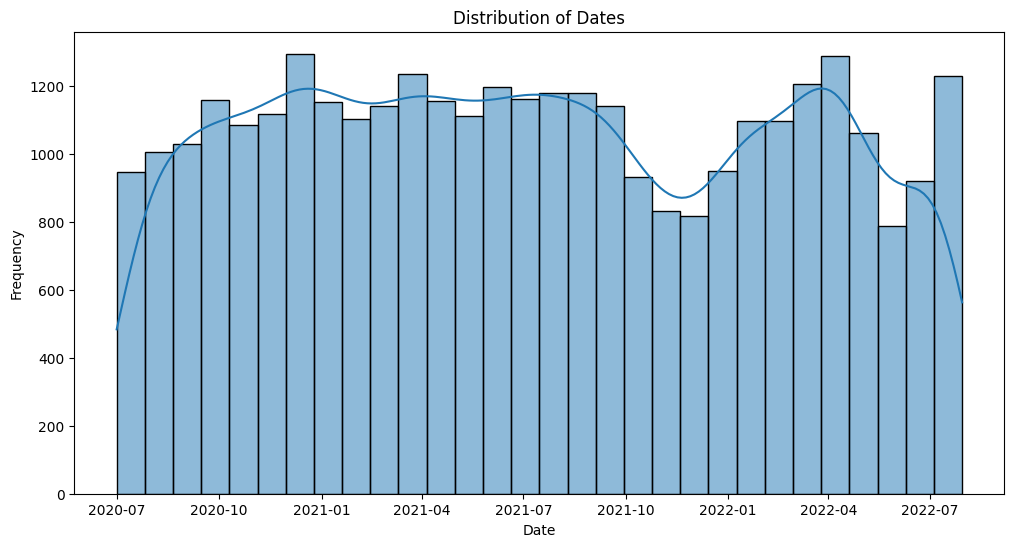

In [56]:
#Create distribution graph for df_encoded['Date']
plt.figure(figsize=(12, 6))
sns.histplot(df_category_encoded['Date'], bins=30, kde=True) 
plt.title('Distribution of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

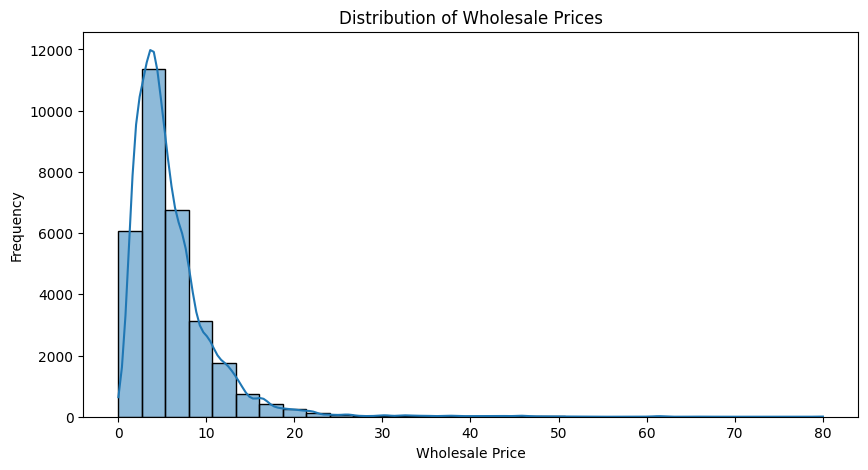

In [57]:
#Create a distribution graph for wholesale_price
plt.figure(figsize=(10, 5))
sns.histplot(df_category_encoded['Wholesale Price (RMB/kg)'], bins=30, kde=True)
plt.title('Distribution of Wholesale Prices')
plt.xlabel('Wholesale Price')
plt.ylabel('Frequency')
plt.show()


In [58]:
#Labeled Data
# Replace missing values in 'Wholesale Price (RMB/kg)' with the mean price of the respective category
df_category_encoded['Wholesale Price (RMB/kg)'] = df_category_encoded.groupby('Category Name')['Wholesale Price (RMB/kg)'].transform(lambda x: x.fillna(x.mean()))
df_category_encoded.isnull().sum()



ID                                           0
Date                                         0
Item Code                                    0
Quantity_Sold_(kilo)                         0
Unit Selling Price (RMB/kg)                  0
Item Name_x                                  0
Category Code                                0
Category Name                                0
Wholesale Price (RMB/kg)                     0
Item Name_y                                  0
Loss Rate (%)                                0
entropy                                      0
Weekday                                      0
IsWeekend                                    0
dayofweek                                    0
Weekday_Friday                               0
Weekday_Monday                               0
Weekday_Saturday                             0
Weekday_Sunday                               0
Weekday_Thursday                             0
Weekday_Tuesday                              0
Weekday_Wedne

In [59]:
#Unlabeled Data
# Replace missing values in 'Wholesale Price (RMB/kg)' with the mean price of the respective category
df_category_encoded_unlabeled['Wholesale Price (RMB/kg)'] = df_category_encoded_unlabeled.groupby('Category Name')['Wholesale Price (RMB/kg)'].transform(lambda x: x.fillna(x.mean()))
df_category_encoded_unlabeled.isnull().sum()

ID                                           0
Date                                         0
Item Code                                    0
Unit Selling Price (RMB/kg)                  0
Item Name_x                                  0
Category Code                                0
Category Name                                0
Wholesale Price (RMB/kg)                     0
Item Name_y                                  0
Loss Rate (%)                                0
entropy                                      0
Weekday                                      0
IsWeekend                                    0
dayofweek                                    0
Weekday_Friday                               0
Weekday_Monday                               0
Weekday_Saturday                             0
Weekday_Sunday                               0
Weekday_Thursday                             0
Weekday_Tuesday                              0
Weekday_Wednesday                            0
Category Name

**4. Train Model**

In [60]:
#XGBoost Classifier with scaled data and k-fold cross-validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBRegressor
#,'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday','Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'
features = ['Wholesale Price (RMB/kg)', 'Unit Selling Price (RMB/kg)', 'IsWeekend','Category Name_Aquatic Tuberous Vegetables', 'Category Name_Cabbage', 'Category Name_Capsicum','Category Name_Edible Mushroom', 'Category Name_Flower/Leaf Vegetables', 'Category Name_Solanum', 'Loss Rate (%)', 'entropy',]
X = df_category_encoded[features]
y = df_category_encoded['Quantity_Sold_(kilo)']


model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
r2_scores = []
mae_scores = []
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

# Display mean ± std for each metric
print(f"R²:  {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")
print(f"MAE: {np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")
print(f"MSE: {np.mean(mse_scores):.3f} ± {np.std(mse_scores):.3f}")
print(r2_scores)
print(mae_scores)
print(mse_scores)





R²:  0.729 ± 0.018
MAE: 3.296 ± 0.036
MSE: 44.657 ± 3.835
[0.7222411108564153, 0.7326514687621857, 0.7467713413404746, 0.6983004807464656, 0.7463638373427938]
[3.2966480673907346, 3.243559971390771, 3.34254264228764, 3.325745283163606, 3.2690158382104393]
[40.50950428002126, 43.626495377600165, 44.45585645983037, 51.86166012910851, 42.831498022918844]


In [61]:
print(r2_scores)
print(mae_scores)
print(mse_scores)


[0.7222411108564153, 0.7326514687621857, 0.7467713413404746, 0.6983004807464656, 0.7463638373427938]
[3.2966480673907346, 3.243559971390771, 3.34254264228764, 3.325745283163606, 3.2690158382104393]
[40.50950428002126, 43.626495377600165, 44.45585645983037, 51.86166012910851, 42.831498022918844]


In [62]:
# Predict unlabeled data
df_category_encoded_unlabeled['Quantity_Sold_(kilo)']=0.0
y_unlabeled = model.predict(df_category_encoded_unlabeled[features])
output_quantity = pd.DataFrame(y_unlabeled, columns=['Quantity_Sold_(kilo)'])
output_id = pd.DataFrame(data_unlabeled['ID'], columns=['ID'])
output = pd.concat([output_id, output_quantity], axis=1)
output

,ID,Quantity_Sold_(kilo)
0,32650,16.089027
1,32643,14.257221
2,32644,6.887241
3,32645,3.827118
4,32646,2.602414
...,...,...
13975,46575,10.452306
13976,46576,2.219808
13977,46577,42.576683
13978,46579,7.007500
